# Logistic regression model on heart disease prediction

Importing important libraries for model building

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc


 First import the data & do all the necessary preprocessing to get cleaned and proper data for the model to train

In [52]:
data = pd.read_csv('C:\\Users\\admin\\Downloads\\heart.csv')
data.head(4)
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

As i know that there is no null values in our dataset so i am skipping the null imputaton part

As all values are in numerical format ,so no need of converting them using label encoding or one hot encoding

First divide the target and independent variables and then perform scaling on independent variables for numeric variables only

In [ ]:
y = data['target']
data = data.drop(['target'],axis =1)


In [68]:
data.head(3)
num_index = [0,3,4,7,9]
col_length = data.shape[1]
cat_index = [i not in num_index for i in range(col_length)]

num_data = data.ix[:,num_index]
cat_data = data.ix[:,cat_index]

D:\Installations\Anaconda\Anaconda_installation\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
D:\Installations\Anaconda\Anaconda_installation\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
D:\Installations\Anaconda\Anaconda_installation\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guid

In [71]:
sc = StandardScaler()
scnum_data = sc.fit_transform(num_data)
N_data = pd.DataFrame(scnum_data)
N_data.head()
cat_data

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [74]:
colnames= data.columns
num_columns = colnames[num_index]

In [75]:
N_data = pd.DataFrame(scnum_data,columns = num_columns)

In [76]:
N_data.head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [79]:
f_data = pd.concat([N_data,cat_data],axis =1)

In [80]:
f_data.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2


EDA should be performed ,but we are skipping that part for now

In [81]:
x_train,x_test,y_train,y_test = train_test_split(f_data,y,test_size = 0.2)

In [83]:
x_train.shape

(242, 13)

Model building 

In [85]:
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)

D:\Installations\Anaconda\Anaconda_installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred = lr_model.predict(x_test)

In [93]:
cm = confusion_matrix(y_test,y_pred)
cm
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8032786885245902

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [137]:
pre = precision_score(y_test,y_pred)
pre
rec = recall_score(y_test,y_pred)
rec
f1 = f1_score(y_test,y_pred)
f1
fpr,tpr,threshold = roc_curve(y_test,y_pred)
roc_score = roc_auc_score(y_test,y_pred)
roc_score

0.7965367965367965

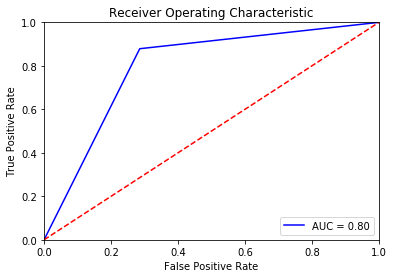

In [142]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
THRESHOLD = 0.7 #this is default threshold
preds = np.where(lr.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
cm1 = confusion_matrix(y_test,preds)
acc = accuracy_score(y_test,preds)
pre = precision_score(y_test,preds)
rec = recall_score(y_test,preds)
cm1
acc
pre
rec


0.8181818181818182

In [147]:
roc_score1=roc_auc_score(y_test,preds)
fpr1, tpr1, threshold1 = roc_curve(y_test, preds)

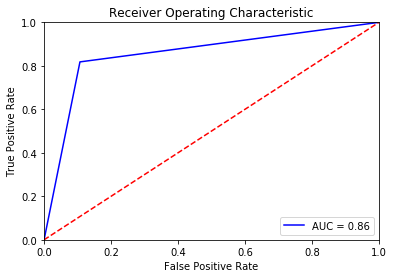

In [148]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_score1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature importance 

In [160]:
abs(lr_model.coef_[0])

array([0.07885181, 0.27893617, 0.11900809, 0.46175922, 0.49484937,
       1.16414082, 0.890567  , 0.13615273, 0.41105237, 0.96261539,
       0.63853384, 0.86521768, 0.71141463])

Graph of feature importance

Text(0.5, 0, 'Relative Feature Importance')

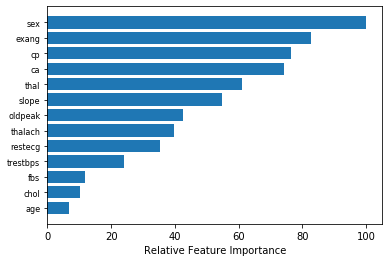

In [161]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')